In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from utils import paths
import os

In [2]:
os.listdir(paths.DATA_OCT)

['4th Level LRP to 3 Digit Track Code.xlsx',
 '5th Level LRP to 4th Digit Track Code.xlsx.xlsx',
 'BOM_Rainfall_History',
 'BOM_Rainfall_History.zip',
 'GPR Data for Corridor C138 Northgate to Caboolture.xlsx',
 'GPR Data for NCL C195 Theebine to Bundaberg 2015.zip',
 'LRP Details.xlsx',
 'MAT Codes.docx',
 'Notification and Activity Codes 10.10.2019.xlsx',
 'Notification and Fault Codes 10.10.2019.xlsx',
 'SEQ_MMY004_Exceptions Northgate to Caboolture .csv',
 'Speed and Curve linear classification data.xls.xlsx',
 'Track Code List.xlsx',
 'Track Code List_2.xlsx',
 'Track Culvert and Level Crossing data.xlsx',
 'Translation Process.pptx',
 'Work Orders for Corridors C138 and C195 10.10.2019 including costs.xlsx']

In [3]:
df = pd.read_excel(os.path.join(paths.DATA_OCT, 'Work Orders for Corridors C138 and C195 10.10.2019 including costs.xlsx'))
df_tc = pd.read_csv('track_code_translated.csv')

In [4]:
df.head()

,Planner group,Order Type,Order,Description,Lin.Ref.Pattern,Start Point,End Point,Length,Bas. start date,Basic fin. date,...,TotalPlnndCosts,Total act.costs,SystemCondition,Notification,Notifcn Status,WBS element,Plant section,Main WorkCtr,MaintActivType,MAT descriptn
0,SEQ,NS01,6100045277,Robinson Rd Overpass Splay 14-15,C138,14.595,14.605,0.010,2012-07-02,2015-03-31,...,1086.0,65265.05,1,NaN,NaN,NaN,STU,MRH03,N31,Mechanised Resleepering
1,RSS,NS04,6400003777,Lvl Xing Recon 13.350 - 13.400km Bilsen,C138,11.000,51.000,40.000,2014-07-01,2015-09-30,...,3896.6,14280.25,T,NaN,NaN,NaN,TRK,MSR01,N32,Mechanised Resurfacing
2,SEQ,NS01,6100037532,LIFT & PACK 24.650 to 24.770km middle rd,C138,24.650,24.770,0.120,2015-01-12,2015-02-11,...,4170.0,3432.00,T,1100021790,NOCO ORAS,NaN,TRK,MSF11,N53,Top & Line Spot Resurfacing
3,SEQ,NS01,6100048397,LIFT & PACK 25.678 to 25.680km DOWN rd,C138,11.000,51.000,40.000,2015-01-12,2015-04-12,...,2514.0,799.20,T,1100021792,NOCO ORAS,NaN,TRK,MSF11,N53,Top & Line Spot Resurfacing
4,SEQ,NS01,6100017640,lift and pack 780 points up road,C138,36.445,36.445,0.000,2015-02-02,2015-03-04,...,3432.0,3312.00,T,1100023230,NOCO ORAS,NaN,NaN,MSF06,N53,Top & Line Spot Resurfacing


In [5]:
df['Length'] = df['Length'].map(lambda x: float(str(x).replace(',', ''))).replace(0, 0.001)
df['cost_per_length'] = df['Total act.costs']/df['Length']

MAT descriptn
Ballast Undercutting           AxesSubplot(0.125,0.125;0.775x0.755)
Formation repairs              AxesSubplot(0.125,0.125;0.775x0.755)
Maintenance Ballasting         AxesSubplot(0.125,0.125;0.775x0.755)
Mechanised Resleepering        AxesSubplot(0.125,0.125;0.775x0.755)
Mechanised Resurfacing         AxesSubplot(0.125,0.125;0.775x0.755)
Top & Line Spot Resurfacing    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

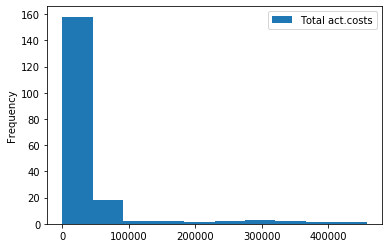

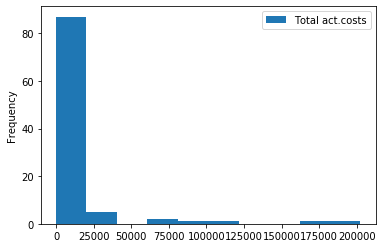

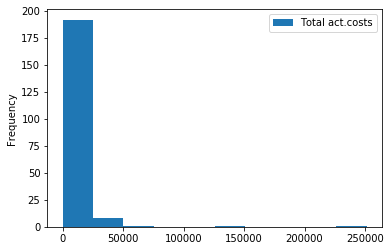

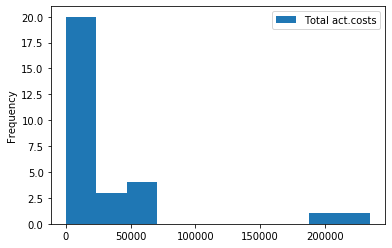

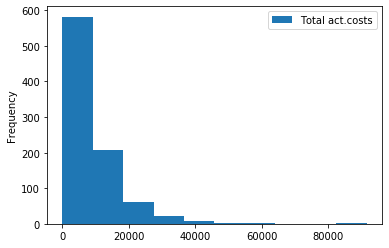

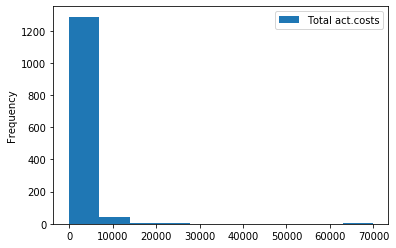

In [11]:
df[['MAT descriptn', 'Total act.costs']].groupby('MAT descriptn').plot(kind = 'hist', legend = True)


MAT descriptn
Ballast Undercutting           [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Formation repairs              [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Maintenance Ballasting         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Mechanised Resleepering        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Mechanised Resurfacing         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Top & Line Spot Resurfacing    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

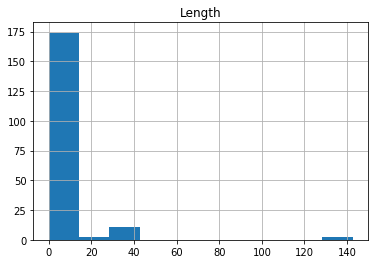

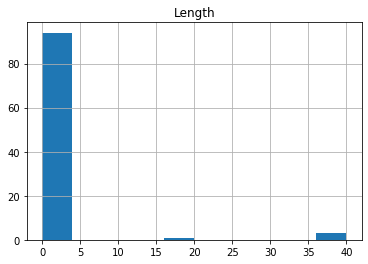

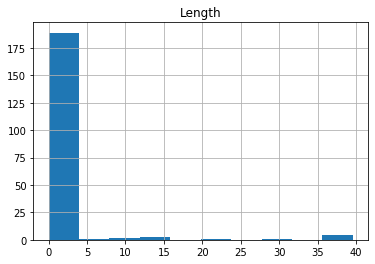

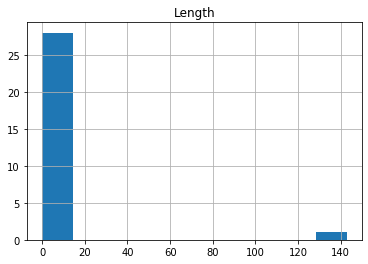

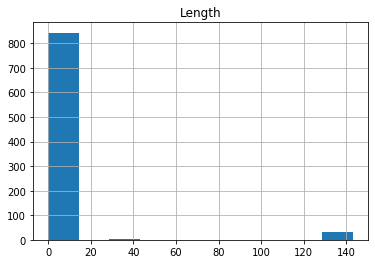

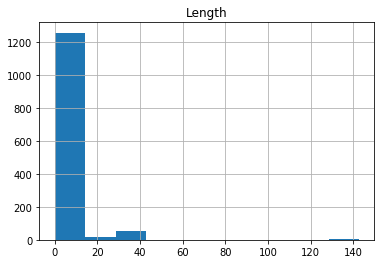

In [12]:
df[df['Length']<200][['MAT descriptn', 'Length']].groupby('MAT descriptn').hist()

In [13]:
df[df['Length']<200][['MAT descriptn', 'cost_per_length']].groupby('MAT descriptn').agg({'cost_per_length': ['mean', 'std']})

cost_per_length              
                                       mean           std
MAT descriptn                                            
Ballast Undercutting           1.641376e+06  5.883315e+06
Formation repairs              2.808570e+06  1.799299e+07
Maintenance Ballasting         1.106776e+06  2.409907e+06
Mechanised Resleepering        6.539029e+06  1.518818e+07
Mechanised Resurfacing         1.207420e+06  3.736218e+06
Top & Line Spot Resurfacing    9.434424e+05  2.938490e+06

In [14]:
df[df['Length']<200][['MAT descriptn', 'Total act.costs']].groupby('MAT descriptn').agg([np.median, np.min, np.max])

Total act.costs                  
                                     median   amin       amax
MAT descriptn                                                
Ballast Undercutting               9388.430    0.0  458451.04
Formation repairs                  3872.325    0.0  202456.71
Maintenance Ballasting             3812.480    0.0  251542.15
Mechanised Resleepering            3764.150    0.0  234805.35
Mechanised Resurfacing             6772.220    0.0   91526.32
Top & Line Spot Resurfacing        1716.000 -116.2   69916.32

In [75]:
df[df['Length']<200][['MAT descriptn', 'TotalPlnndCosts']].groupby('MAT descriptn').agg([np.median, np.min, np.max])

TotalPlnndCosts                   
                                     median    amin       amax
MAT descriptn                                                 
Ballast Undercutting                9023.30    0.00  354516.95
Formation repairs                   6240.48  422.70  238605.37
Maintenance Ballasting              2930.52  159.05   48802.00
Mechanised Resleepering             3840.00  128.01  226677.68
Mechanised Resurfacing              4525.63    0.00   69189.26
Top & Line Spot Resurfacing         2349.54    0.00   40850.50

In [76]:
a = pd.read_excel(pd.ExcelFile(os.path.join(paths.DATA_OCT,'track Code List_2.xlsx')))

In [80]:
b = a.groupby('Track code').count()['Start KM'].reset_index()
b[b["Start KM"]>2]

,Track code,Start KM
20,217011,11
43,354011,4
57,400011,8
63,401011,8
69,409011,3
75,417011,5
85,459401,5
131,522011,4
150,546011,3
154,551011,3
